1. Explain the role of weights in a neuron.

Think of weights as the "importance" or "strength" assigned to a specific input. In a biological sense, they represent the strength of synaptic connections.Mathematical Role: Each input ($x_i$) is multiplied by a weight ($w_i$).Significance: If a weight is high, that specific input has a large impact on the neuron's output. If the weight is zero, the input is effectively ignored.Learning: When we say a model is "learning," we really mean it is iteratively adjusting these weights to reduce error.

2. What is an Activation Function?

The activation function is the "gatekeeper" at the end of the neuron. It decides whether the neuron should "fire" (pass information forward) and by how much.

Adding Non-linearity: Without activation functions, a neural network is just a giant linear equation—it wouldn't be able to learn complex patterns like images or human speech.

Common Examples: * Sigmoid: Squashes values between 0 and 1 (great for probability).

ReLU (Rectified Linear Unit): Passes positive values through but turns all negative values to zero.

3. Probability Distribution in ML

In Machine Learning, a probability distribution is a mathematical function that describes the likelihood of different outcomes.

In Classification: If you're classifying an image as a "Cat" or "Dog," the model outputs a distribution (e.g., Cat: 0.85, Dog: 0.15).

In Generative AI: Models learn the probability distribution of words or pixels so they can predict what should come next.

4. What is a Gradient?

In optimization, a gradient is a vector that points in the direction of the steepest increase of a function.

In ML, we use Gradient Descent to find the "bottom of the hill" (the lowest error). We calculate the gradient of the loss function and move the weights in the opposite direction to minimize mistakes.$$\theta_{next} = \theta_{current} - \eta \cdot \nabla J(\theta)$$

Step 1: Preparing Dataset...

Step 2: Training the Neural Network...
Epoch 1/30


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9434 - loss: 0.3841 - val_accuracy: 0.9625 - val_loss: 0.3584
Epoch 2/30
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9525 - loss: 0.3667 - val_accuracy: 0.9625 - val_loss: 0.3389
Epoch 3/30
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9566 - loss: 0.3469 - val_accuracy: 0.9625 - val_loss: 0.3213
Epoch 4/30
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9552 - loss: 0.3333 - val_accuracy: 0.9625 - val_loss: 0.3056
Epoch 5/30
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9581 - loss: 0.3175 - val_accuracy: 0.9625 - val_loss: 0.2913
Epoch 6/30
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9570 - loss: 0.3015 - val_accuracy: 0.9650 - val_loss: 0.2784
Epoch 7/30
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9492 - loss: 0.2947 - val_accuracy: 0.9675 - val_loss: 0.2666
Epoch 8/30
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9455 - loss: 0.2834 - val_accuracy: 0.9675 - val_loss: 0.2559
Epo

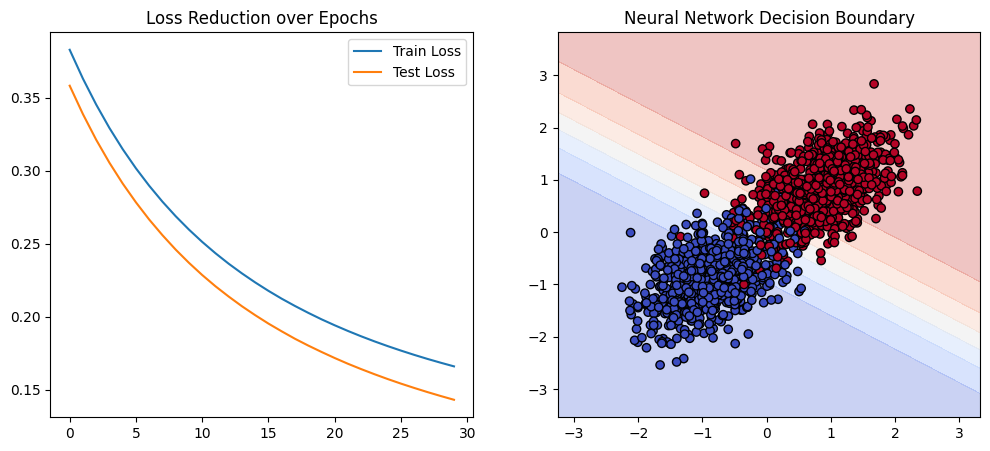

In [4]:
#5.Create a project using logistic regression with tensor
# The Project: Binary Classification using Logistic Regression (Single-Layer Perceptron)
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# 1. GENERATE SYNTHETIC DATA (Simulating a real-world classification task)
print("Step 1: Preparing Dataset...")
np.random.seed(42)
# Creating two distinct clusters of data points
num_samples = 1000
class_0 = np.random.multivariate_normal([1, 1], [[1, 0.5], [0.5, 1]], num_samples)
class_1 = np.random.multivariate_normal([4, 4], [[1, 0.5], [0.5, 1]], num_samples)

X = np.vstack((class_0, class_1)).astype(np.float32)
y = np.vstack((np.zeros((num_samples, 1)), np.ones((num_samples, 1)))).astype(np.float32)

# 2. DATA PREPROCESSING
# Splitting into 80% Training and 20% Testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling features (Crucial for Neural Networks)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 3. BUILD THE NEURAL NETWORK ARCHITECTURE
# In Neural Network terms, Logistic Regression is a Single Dense Layer with 1 Neuron
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=1, input_shape=(2,), activation='sigmoid')
])
# 4. COMPILE THE MODEL
model.compile(
    optimizer='adam',           # Optimization algorithm (Gradient Descent variant)
    loss='binary_crossentropy', # Loss function for 0/1 classification
    metrics=['accuracy']        # Metric to monitor
)

# 5. TRAIN THE MODEL
print("\nStep 2: Training the Neural Network...")
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_test, y_test), verbose=1)

# 6. EVALUATION & VISUALIZATION
print("\nStep 3: Generating Results...")
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"\nFinal Test Accuracy: {accuracy*100:.2f}%")

# Plot 1: Loss Curve (The "Learning" process)
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.title('Loss Reduction over Epochs')
plt.legend()

# Plot 2: Decision Boundary (The "Result")
plt.subplot(1, 2, 2)
# Create a grid to show the decision boundary
h = .02
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap='coolwarm', alpha=0.3)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, edgecolors='k', cmap='coolwarm')
plt.title('Neural Network Decision Boundary')
plt.show()